In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df=pd.read_csv('train.csv')

In [32]:
df.shape

(404290, 6)

In [33]:
new_df=df.sample(30000,random_state=5)

In [34]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [35]:
# data analysis and visualization waala part aayga

In [36]:
# feature engineering 
new_df['q1_len']=new_df['question1'].str.len()
new_df['q2_len']=new_df['question2'].str.len()

In [37]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
327710,327710,454159,454160,How accurate is the depiction of the lives of ...,"I am not American, but lived in the USA. Why d...",0,76,195
162790,162790,139559,53547,How do I download playlist?,Is there any way to download YouTube playlists?,1,27,47
48929,48929,87139,87140,What do Russian people think about communism?,I want to know how real Russian and former Sov...,1,45,79
379811,379811,511359,511360,What are some better CS GO betting sites?,Aam Aadmi Party was formed with a sensible age...,0,41,108
228396,228396,337462,337463,How many years old are the Australian Aborigines?,How many years have Australian Aborigines exis...,0,49,50


In [38]:
new_df['q1_num_words']=new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words']=new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
327710,327710,454159,454160,How accurate is the depiction of the lives of ...,"I am not American, but lived in the USA. Why d...",0,76,195,14,38
162790,162790,139559,53547,How do I download playlist?,Is there any way to download YouTube playlists?,1,27,47,5,8
48929,48929,87139,87140,What do Russian people think about communism?,I want to know how real Russian and former Sov...,1,45,79,7,14
379811,379811,511359,511360,What are some better CS GO betting sites?,Aam Aadmi Party was formed with a sensible age...,0,41,108,8,18
228396,228396,337462,337463,How many years old are the Australian Aborigines?,How many years have Australian Aborigines exis...,0,49,50,8,7


In [39]:
def common_words(row):
    w1=set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2=set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return len(w1 & w2)

In [40]:
new_df['word_common']=new_df.apply(common_words,axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
327710,327710,454159,454160,How accurate is the depiction of the lives of ...,"I am not American, but lived in the USA. Why d...",0,76,195,14,38,5
162790,162790,139559,53547,How do I download playlist?,Is there any way to download YouTube playlists?,1,27,47,5,8,1
48929,48929,87139,87140,What do Russian people think about communism?,I want to know how real Russian and former Sov...,1,45,79,7,14,5
379811,379811,511359,511360,What are some better CS GO betting sites?,Aam Aadmi Party was formed with a sensible age...,0,41,108,8,18,0
228396,228396,337462,337463,How many years old are the Australian Aborigines?,How many years have Australian Aborigines exis...,0,49,50,8,7,4


In [41]:
def total_words(row):
    w1=set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2=set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return (len(w1) + len(w2))

In [42]:
new_df['word_total']=new_df.apply(total_words,axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
327710,327710,454159,454160,How accurate is the depiction of the lives of ...,"I am not American, but lived in the USA. Why d...",0,76,195,14,38,5,45
162790,162790,139559,53547,How do I download playlist?,Is there any way to download YouTube playlists?,1,27,47,5,8,1,13
48929,48929,87139,87140,What do Russian people think about communism?,I want to know how real Russian and former Sov...,1,45,79,7,14,5,21
379811,379811,511359,511360,What are some better CS GO betting sites?,Aam Aadmi Party was formed with a sensible age...,0,41,108,8,18,0,25
228396,228396,337462,337463,How many years old are the Australian Aborigines?,How many years have Australian Aborigines exis...,0,49,50,8,7,4,15


In [43]:
new_df['word_share']=round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
327710,327710,454159,454160,How accurate is the depiction of the lives of ...,"I am not American, but lived in the USA. Why d...",0,76,195,14,38,5,45,0.11
162790,162790,139559,53547,How do I download playlist?,Is there any way to download YouTube playlists?,1,27,47,5,8,1,13,0.08
48929,48929,87139,87140,What do Russian people think about communism?,I want to know how real Russian and former Sov...,1,45,79,7,14,5,21,0.24
379811,379811,511359,511360,What are some better CS GO betting sites?,Aam Aadmi Party was formed with a sensible age...,0,41,108,8,18,0,25,0.00
228396,228396,337462,337463,How many years old are the Australian Aborigines?,How many years have Australian Aborigines exis...,0,49,50,8,7,4,15,0.27


minimum character 2
maximum character 343
average num of character 59


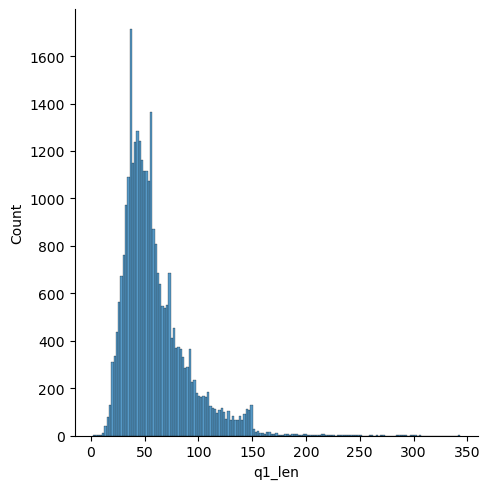

In [44]:
# Analysis of features
sns.displot(new_df['q1_len'])
print('minimum character',new_df['q1_len'].min())
print('maximum character',new_df['q1_len'].max())
print('average num of character',int(new_df['q1_len'].mean()))

minimum character 1
maximum character 1151
average num of character 59


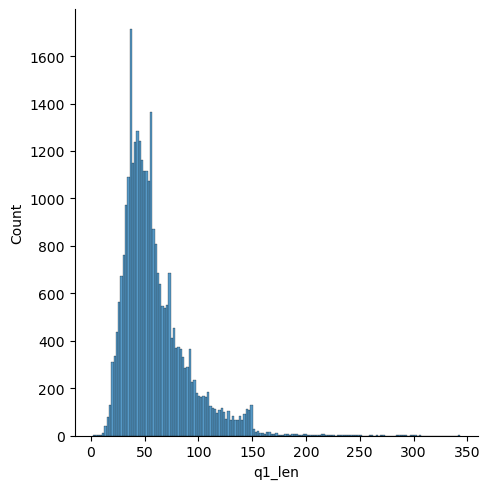

In [45]:
sns.displot(new_df['q1_len'])
print('minimum character',new_df['q2_len'].min())
print('maximum character',new_df['q2_len'].max())
print('average num of character',int(new_df['q2_len'].mean()))

minimum words 1
maximum words 65
average num of words 10


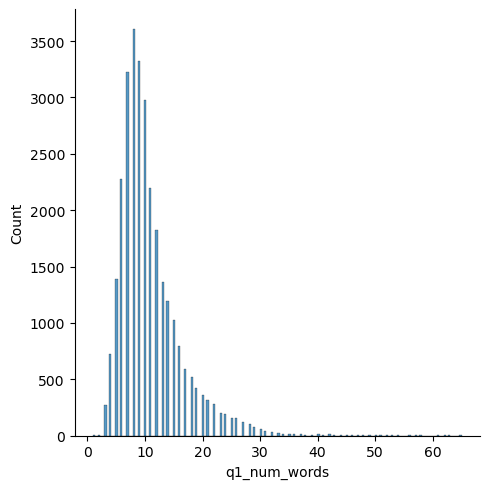

In [46]:
sns.displot(new_df['q1_num_words'])
print('minimum words',new_df['q1_num_words'].min())
print('maximum words',new_df['q1_num_words'].max())
print('average num of words',int(new_df['q1_num_words'].mean()))

minimum character 1
maximum character 1151
average num of character 59


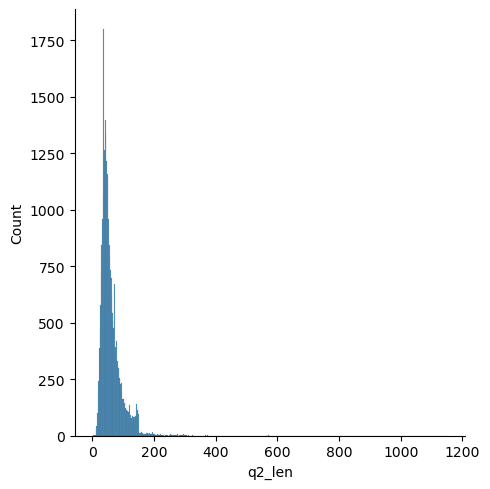

In [47]:
sns.displot(new_df['q2_len'])
print('minimum character',new_df['q2_len'].min())
print('maximum character',new_df['q2_len'].max())
print('average num of character',int(new_df['q2_len'].mean()))

/var/folders/fy/sw7zksmj04xgq7kp42dbk_b00000gn/T/ipykernel_56534/2394905025.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate']==0]['word_common'],label="non duplicate")
/var/folders/fy/sw7zksmj04xgq7kp42dbk_b00000gn/T/ipykernel_56534/2394905025.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457a

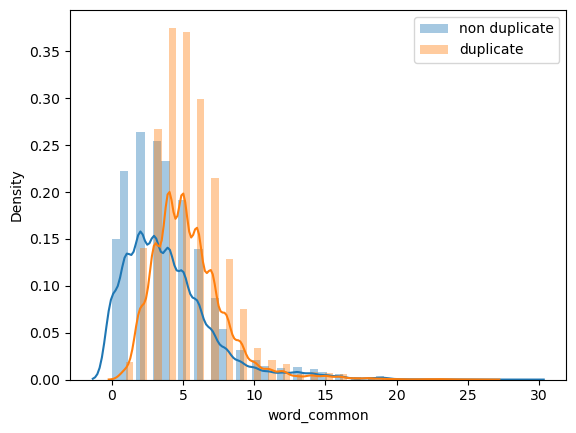

In [48]:
#common words
sns.distplot(new_df[new_df['is_duplicate']==0]['word_common'],label="non duplicate")
sns.distplot(new_df[new_df['is_duplicate']==1]['word_common'],label="duplicate")
plt.legend()
plt.show()



/var/folders/fy/sw7zksmj04xgq7kp42dbk_b00000gn/T/ipykernel_56534/1178264125.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate']==0]['word_total'],label="non duplicate")
/var/folders/fy/sw7zksmj04xgq7kp42dbk_b00000gn/T/ipykernel_56534/1178264125.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad

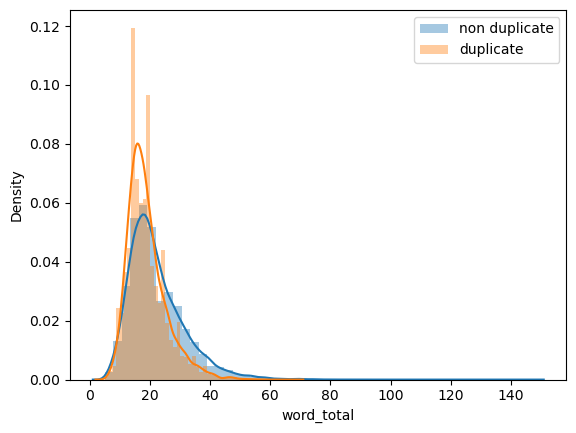

In [49]:
#total words
sns.distplot(new_df[new_df['is_duplicate']==0]['word_total'],label="non duplicate")
sns.distplot(new_df[new_df['is_duplicate']==1]['word_total'],label="duplicate")
plt.legend()
plt.show()


/var/folders/fy/sw7zksmj04xgq7kp42dbk_b00000gn/T/ipykernel_56534/1304001404.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate']==0]['word_share'],label="non duplicate")
/var/folders/fy/sw7zksmj04xgq7kp42dbk_b00000gn/T/ipykernel_56534/1304001404.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad

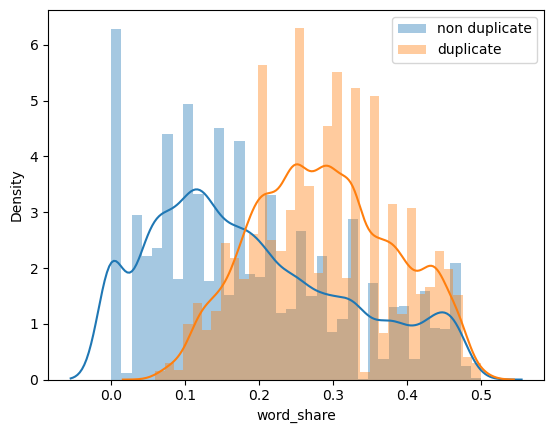

In [50]:
#word share
sns.distplot(new_df[new_df['is_duplicate']==0]['word_share'],label="non duplicate")
sns.distplot(new_df[new_df['is_duplicate']==1]['word_share'],label="duplicate")
plt.legend()
plt.show()


In [51]:
ques_df=new_df[['question1','question2']]
ques_df.head()

,question1,question2
327710,How accurate is the depiction of the lives of ...,"I am not American, but lived in the USA. Why d..."
162790,How do I download playlist?,Is there any way to download YouTube playlists?
48929,What do Russian people think about communism?,I want to know how real Russian and former Sov...
379811,What are some better CS GO betting sites?,Aam Aadmi Party was formed with a sensible age...
228396,How many years old are the Australian Aborigines?,How many years have Australian Aborigines exis...


In [52]:
final_df=new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
327710,0,76,195,14,38,5,45,0.11
162790,1,27,47,5,8,1,13,0.08
48929,1,45,79,7,14,5,21,0.24
379811,0,41,108,8,18,0,25,0.00
228396,0,49,50,8,7,4,15,0.27


In [53]:
from sklearn.feature_extraction.text import CountVectorizer 
questions=list(ques_df['question1'])+list(ques_df['question2'])

cv=CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [54]:
temp_df1=pd.DataFrame(q1_arr, index=ques_df.index)
temp_df2=pd.DataFrame(q2_arr, index=ques_df.index)
temp_df=pd.concat([temp_df1,temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [55]:
final_df=pd.concat([final_df,temp_df], axis=1)
print(final_df.shape)
final_df.head()

(30000, 6008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
327710,0,76,195,14,38,5,45,0.11,0,0,...,0,0,0,0,0,0,0,0,0,0
162790,1,27,47,5,8,1,13,0.08,0,0,...,0,0,0,0,0,0,1,0,0,0
48929,1,45,79,7,14,5,21,0.24,0,0,...,0,0,0,0,0,0,0,0,0,0
379811,0,41,108,8,18,0,25,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
228396,0,49,50,8,7,4,15,0.27,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=42)

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7671666666666667

In [64]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)
accuracy_score(y_test,y_pred)


0.7708333333333334